In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('../../fusion'))
sys.path.append(module_path)

In [2]:
from preprocessing_datasets import load_dataset
from embedding_algorithms import sentence_embedding, set_embedding_model
from dimensionality_reduction_algorithms import dimension_reduction_algorithms
from cluster_algorithms import cluster_algorithm

from helper import load_by_index, get_author_candidate
from plot_tools import plotChart, plotCluster

In [3]:
key_values = {
    'model_type':'bilstm',
    'char_level':False,
    'model_version': 2,
    'rnn_dim':1024,
    'verbose':1,
    'attributes_list': ['authors','title','big_cate', 'small_cate'],
    'embedding_type': 'inferSent',
    'dataset': 'merged_book',
    'cluster_method': 'tsne',
    'dimension_reduction': 'pca',
    'num_components': 2,
    'cluster_method': 'hierarchy',
    'num_clusters': 10
}

# SETUP INFERSENT

In [4]:
set_embedding_model(key_values)

Vocab size : 2196017
model_version: 2
rnn_dim: 1024
model_type: bilstm
char_level: False
Setup time is: 174.47130513191223


# LOAD

In [5]:
dataset_name, table_group_by_isbn, isbn_list, true_authors = load_dataset(key_values)

dataset: merged_book
Loading time is: 21.915996074676514


# Analysis book-1

In [6]:
table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, 0)

ISBN: 0439136350
true author: J. K. Rowling


In [7]:
table_ISBN['authors'].value_counts()

J.K. Rowling                                                               38
Rowling, J. K.                                                             38
Rowling, J.K.                                                              30
J. K. Rowling                                                              10
None                                                                        6
J.K. Rowling; Mary GrandPr? [Illustrator]                                   6
J.K. Rowling, Mary GrandPr                                                  4
Rowling, J K                                                                3
J K Rowling                                                                 3
J.K. ROWLING, MARY GRANDPR                                                  1
J.K. ROWLING                                                                1
ROWLING,J                                                                   1
ROWLING, J. K.: 3rd NOVEL of the HARRY POTTER Septet            

In [8]:
embeddings_tokens = sentence_embedding(table_ISBN, key_values)

embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.4195878505706787


dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.051683664321899414
rows: 167
classes: 167


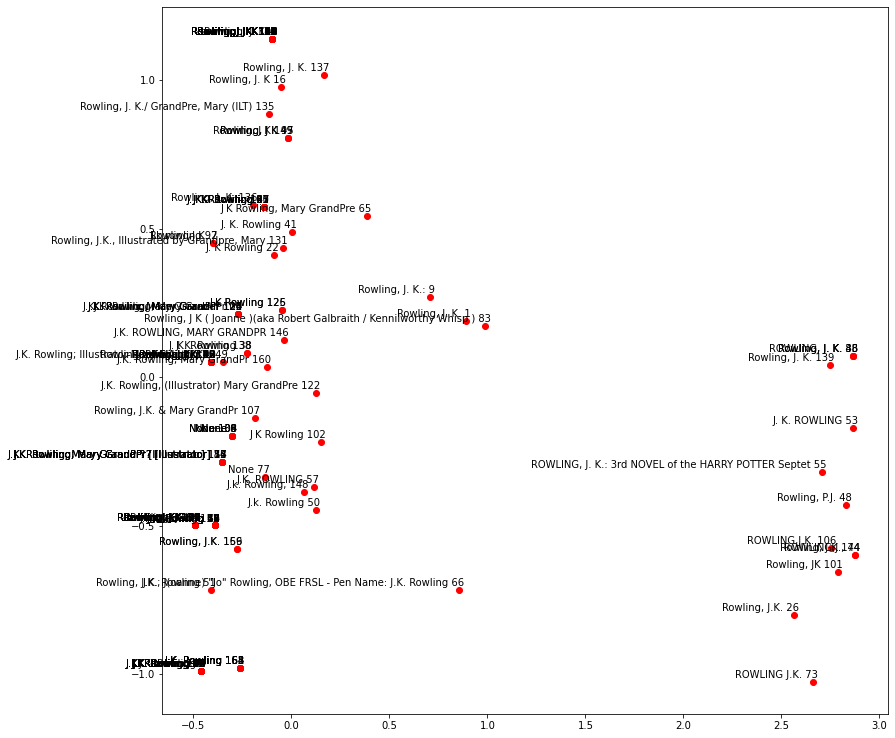

In [9]:
pca_embeddings = dimension_reduction_algorithms(embeddings_tokens, key_values)
plotChart(list_authors, pca_embeddings)

cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0050201416015625
num of classes: 10


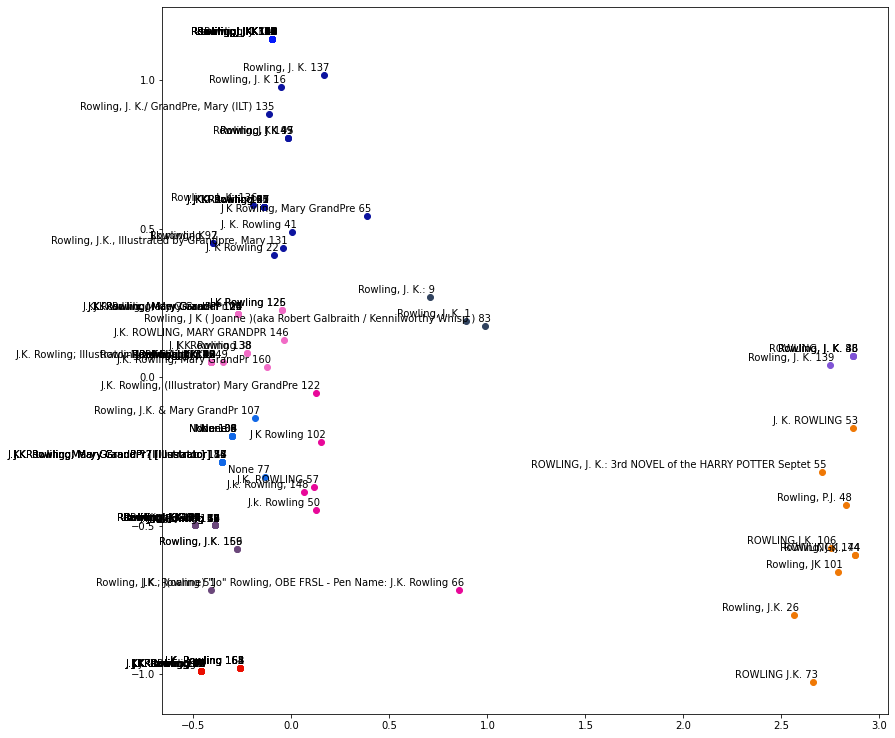

In [11]:
blocks = cluster_algorithm(pca_embeddings, key_values)
plotCluster(blocks, list_authors, key_values['num_clusters'], pca_embeddings)

In [12]:
author_candidate = get_author_candidate(list_authors, blocks)
print("{0} VS true_author: {1}".format(author_candidate, true_author))

{'Rowling, J. K.': 32} VS true_author: J. K. Rowling


# Loop

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 2<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0439784549
true author: J. K. Rowling
-------------------------------
tot cases of author's name: 23
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.8275268077850342
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007725715637207031
rows: 156
classes: 156


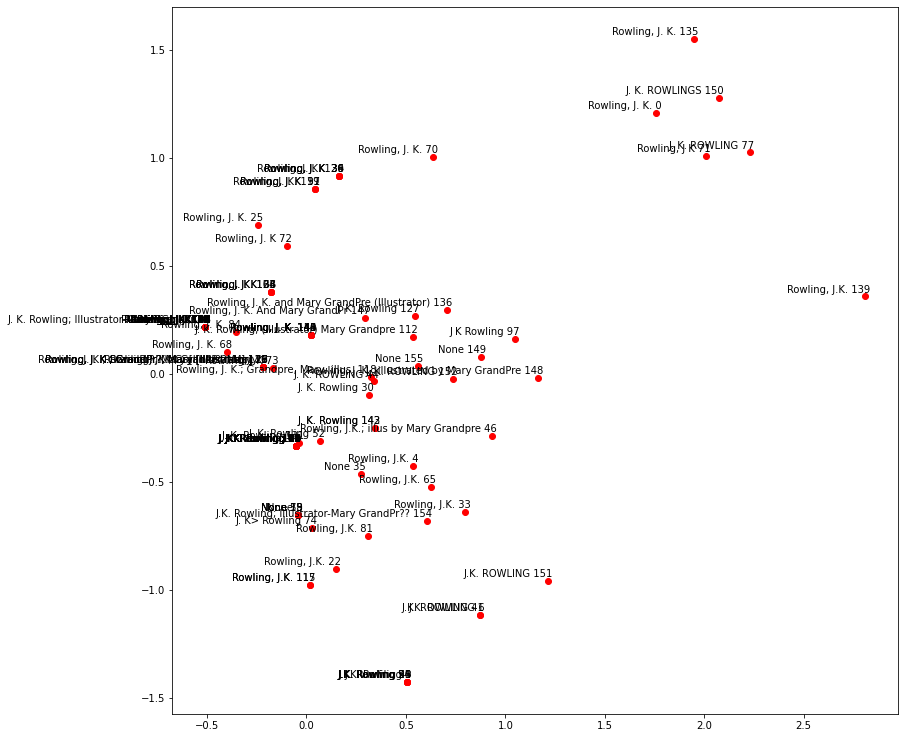

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0026559829711914062
num of classes: 10


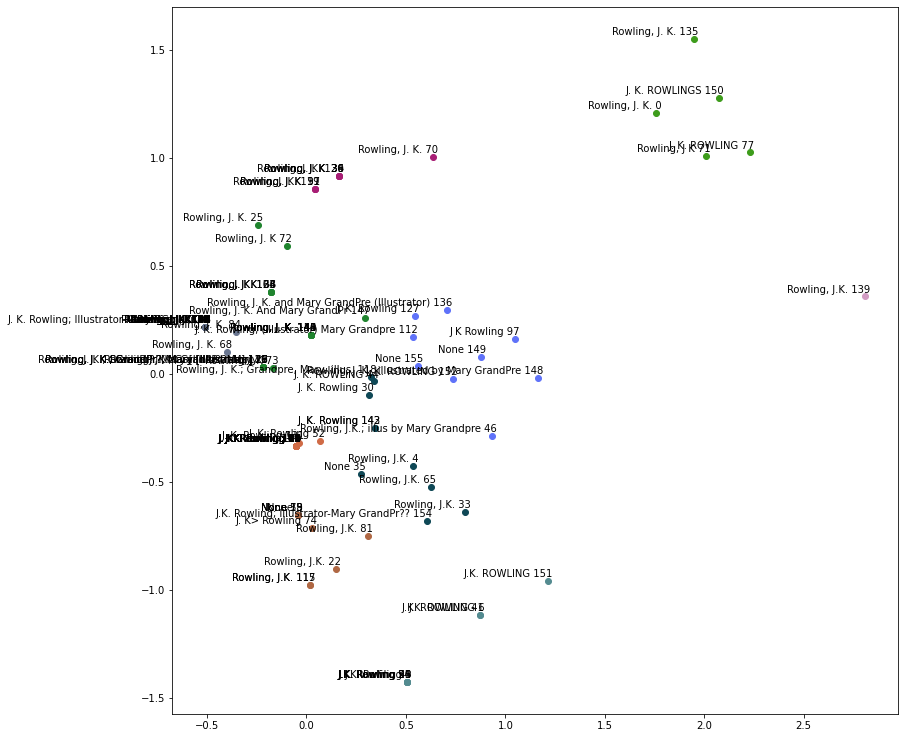

-------------------------------
{'J. K. Rowling; Illustrator-Mary GrandPr': 1, 'ROWLING, J. K.': 1, 'Rowling, J. K.': 54} VS true_author: J. K. Rowling
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 3<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0385349947
true author: Sheryl Sandberg
-------------------------------
tot cases of author's name: 18
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.8997700214385986
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.019366979598999023
rows: 149
classes: 149


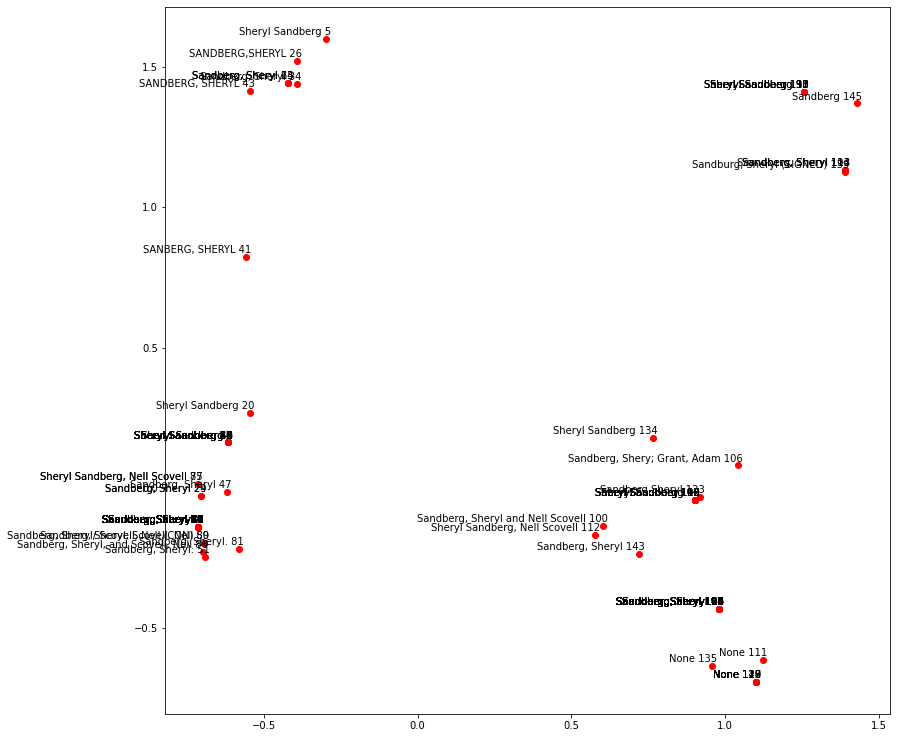

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0018429756164550781
num of classes: 10


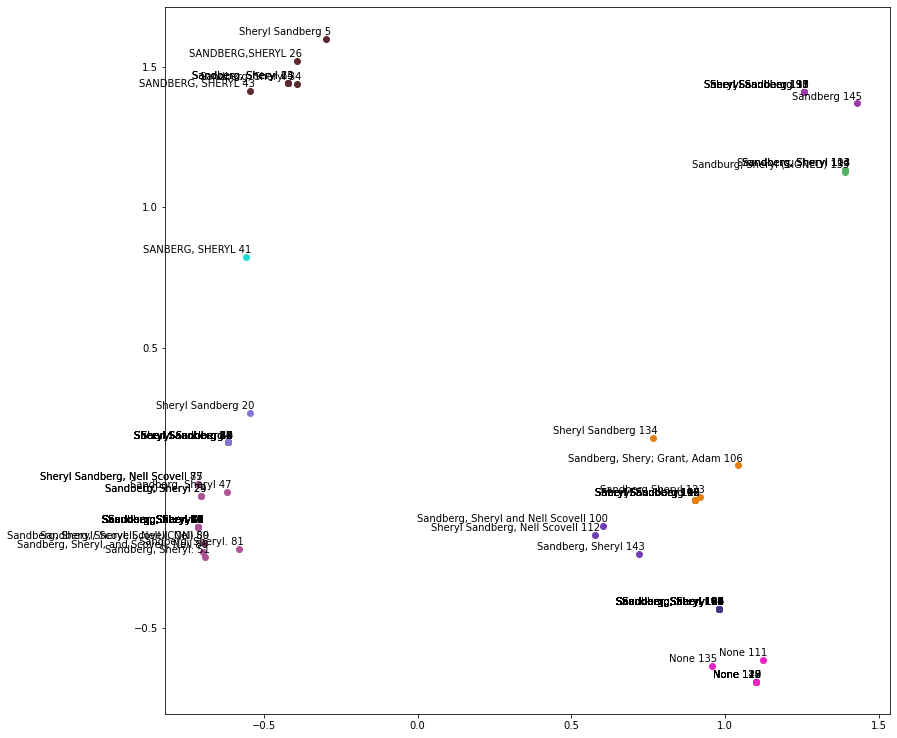

-------------------------------
{'Sandberg, Sheryl': 60, 'Sandberg, Sheryl, and Scovell, Nell': 1, 'Sandberg, Sheryl.': 1, 'Sandberg, Sheryl/ Scovell, Nell (CON)': 1, 'Sandberg, Sheryl:': 1, 'Sandberg, Sheryl; Scovell, Nell': 1, 'Sheryl Sandberg, Nell Scovell': 2} VS true_author: Sheryl Sandberg
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 4<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0787960756
true author: Patrick Lencioni
-------------------------------
tot cases of author's name: 12
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.7511131763458252
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.009001970291137695
rows: 149
classes: 149


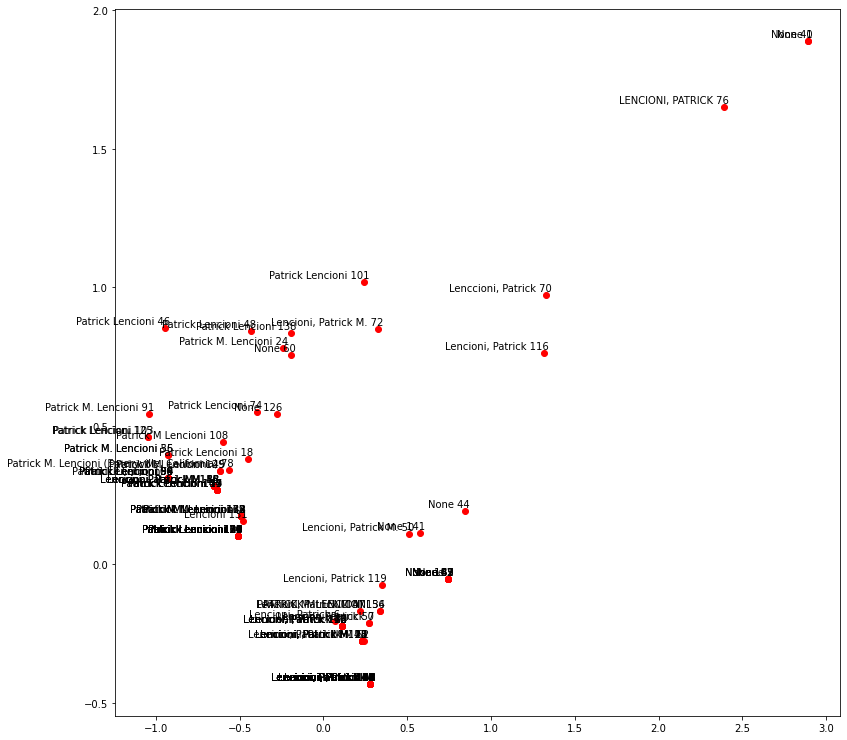

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.004252910614013672
num of classes: 10


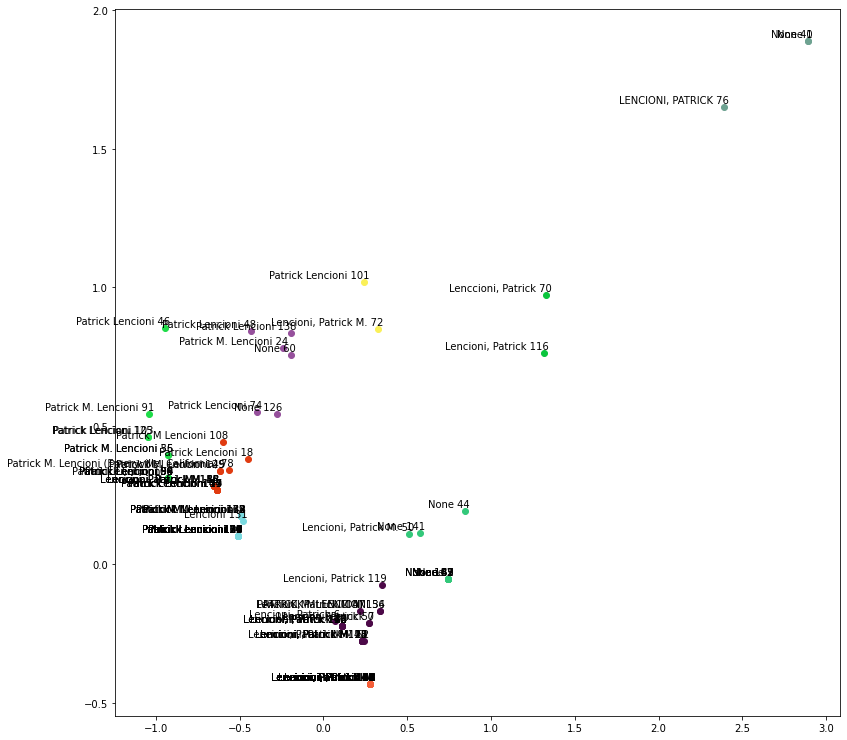

-------------------------------
{'Lencioni, Patrick': 51} VS true_author: Patrick Lencioni
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 5<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0439813786
true author: Brian Selznick
-------------------------------
tot cases of author's name: 11
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6745407581329346
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007256746292114258
rows: 148
classes: 148


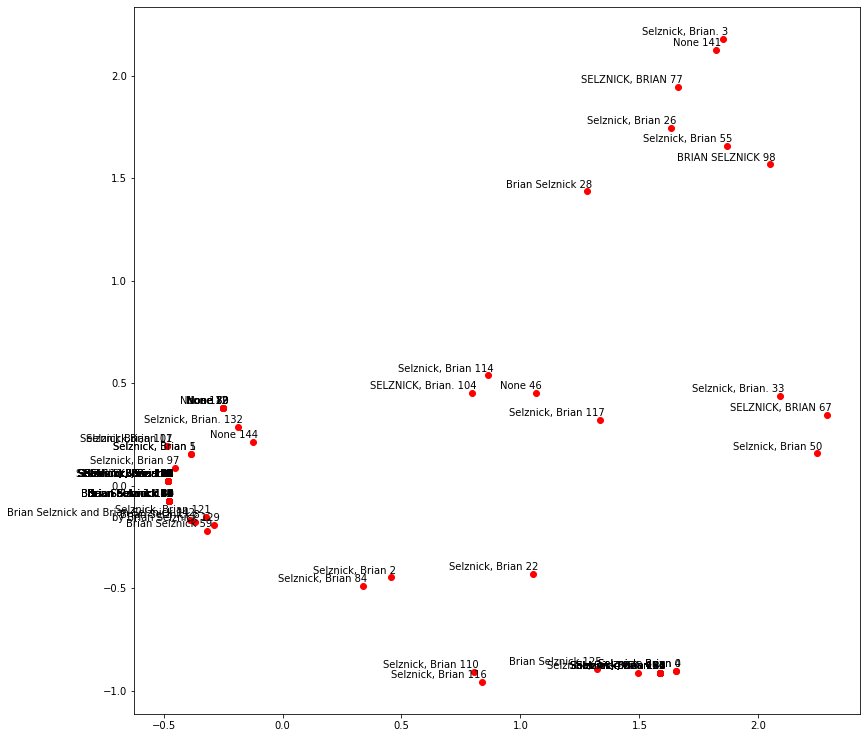

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.001880645751953125
num of classes: 10


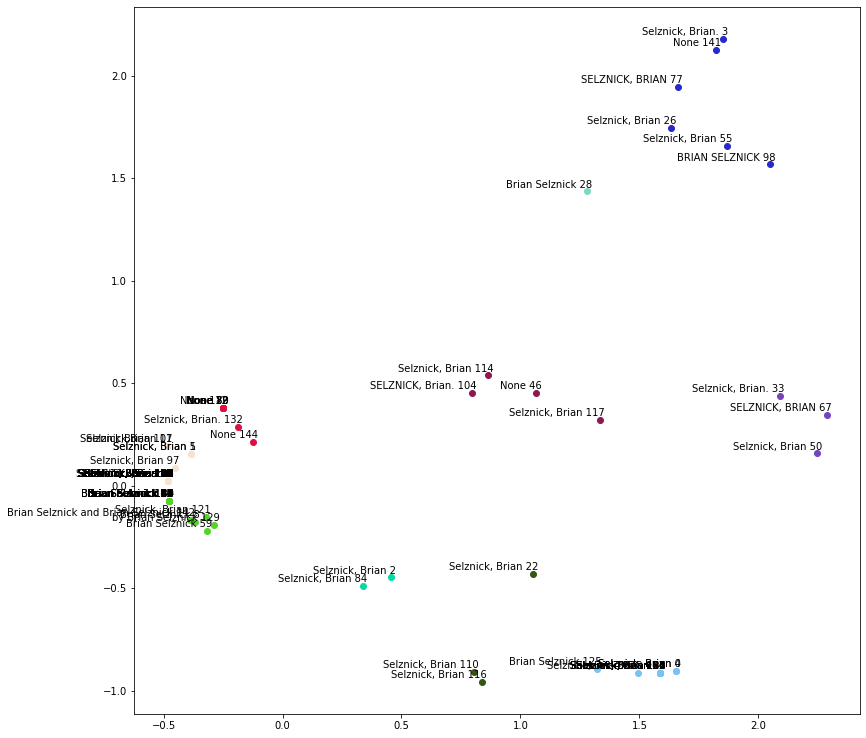

-------------------------------
{'SELZNICK, Brian': 1, 'Selznick, Brian': 78, 'Selznick,Brian': 2} VS true_author: Brian Selznick
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 6<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 067082982X
true author: Stephen King
-------------------------------
tot cases of author's name: 10
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6516580581665039
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.01994180679321289
rows: 146
classes: 146


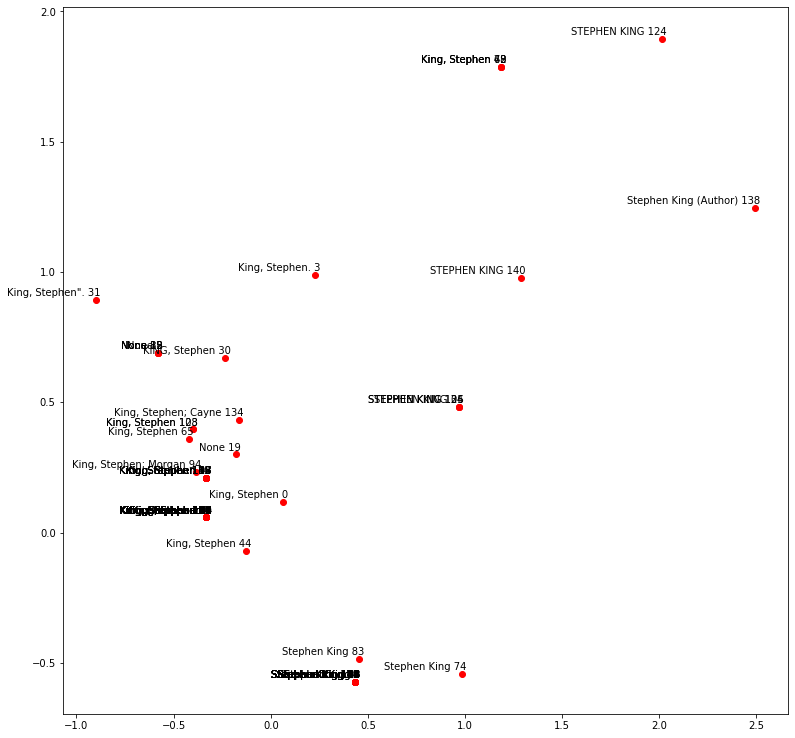

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0020601749420166016
num of classes: 10


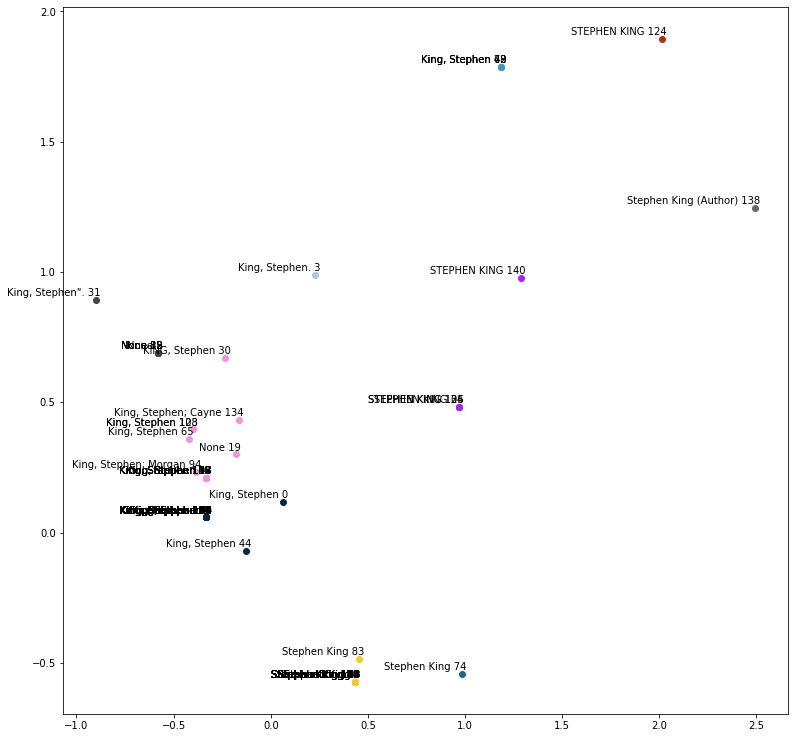

-------------------------------
{'King, Stephen': 71} VS true_author: Stephen King
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 7<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0060530928
true author: Neil Gaiman
-------------------------------
tot cases of author's name: 24
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.47934889793395996
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007823705673217773
rows: 146
classes: 146


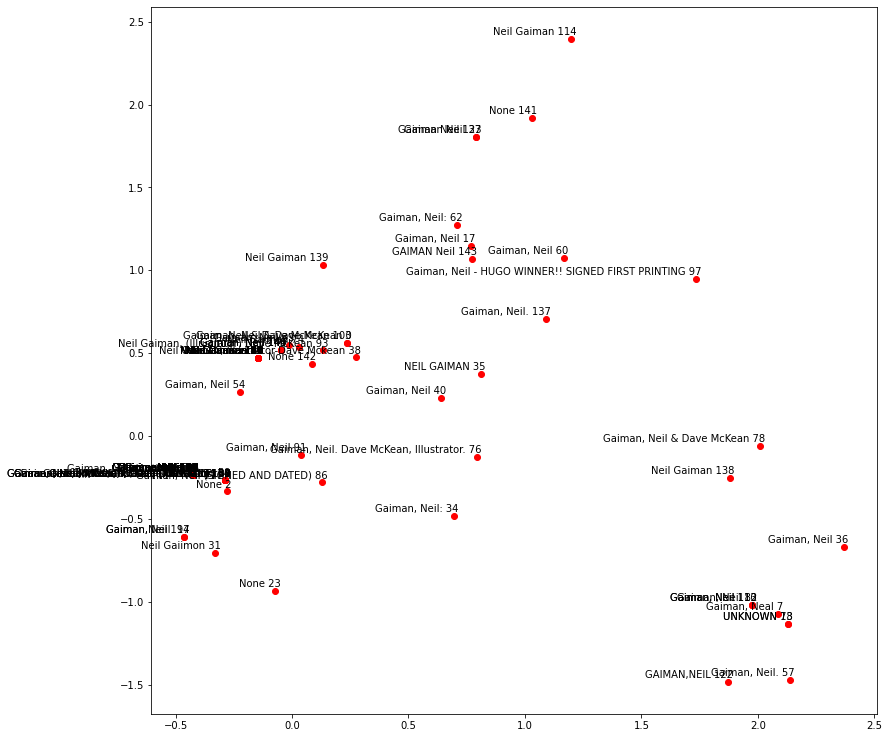

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0054967403411865234
num of classes: 10


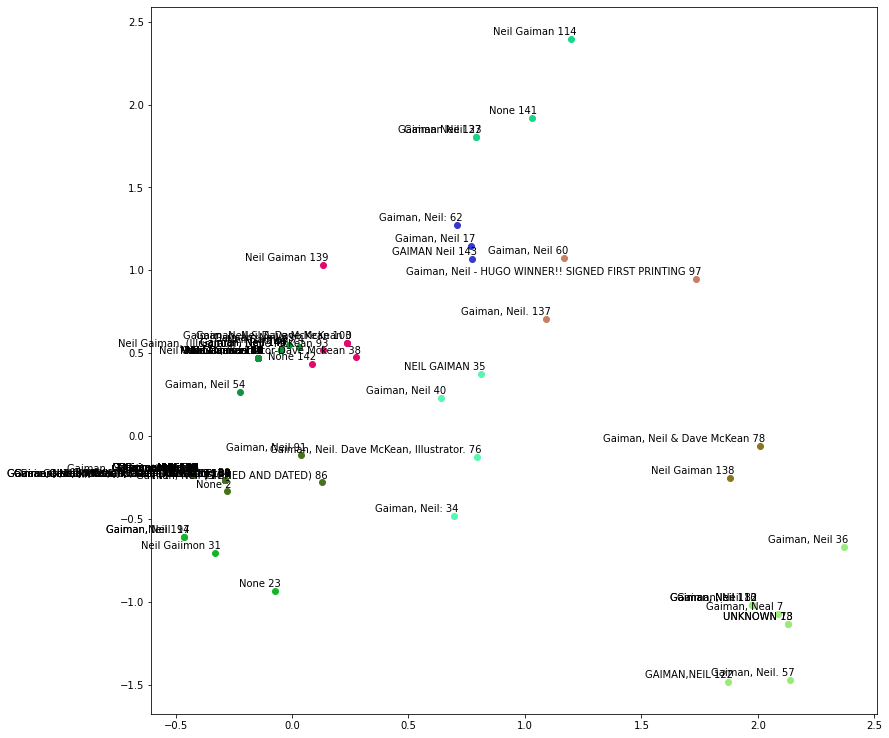

-------------------------------
{'Gaiman, Neil': 67, 'Gaiman, Neil (Author)': 1, 'Gaiman, Neil (SIGNED AND DATED)': 1, 'Gaiman, Neil/ McKean, Dave (ILT)': 3, 'Gaiman, Neil/ McKean, Dave (Illustrator)': 1, 'Gaiman, Neil; McKean, Dave': 1, 'Gaiman, Neil; McKean, Dave [Illustrator]': 5, 'None': 1} VS true_author: Neil Gaiman
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 8<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0439139597
true author: J. K. Rowling
-------------------------------
tot cases of author's name: 25
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.793489933013916
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007377147674560547
rows: 146
classes: 146


In [ ]:
for index in range(1,20):
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>book number {0}<<<<<<<<<<<<<<<<<<<<<<<<".format(index+1))
    table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, index)
    print("-------------------------------")
    print("tot cases of author's name: {0}".format(len(table_ISBN['authors'].value_counts())))
    print("-------------------------------")
    embeddings_tokens = sentence_embedding(table_ISBN, key_values)
    print("-------------------------------")
    pca_embeddings = dimension_reduction_algorithms(embeddings_tokens, key_values)
    plotChart(list_authors, pca_embeddings)
    print("-------------------------------")
    blocks = cluster_algorithm(pca_embeddings, key_values)
    plotCluster(blocks, list_authors, key_values['num_clusters'], pca_embeddings)
    print("-------------------------------")
    author_candidate = get_author_candidate(list_authors, blocks)
    print("{0} VS true_author: {1}".format(author_candidate, true_author))

In [18]:
table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, 2)

ISBN: 0385349947
true author: Sheryl Sandberg, Nell Scovell


In [19]:
table_ISBN['authors'].value_counts()

Sandberg, Sheryl                         95
Sheryl Sandberg                          30
None                                      7
Sheryl Sandberg, Nell Scovell             3
Sandberg, Sheryl.                         1
Sandburg, Sheryl (SIGNED)                 1
Sandberg, Sheryl and Nell Scovell         1
Sandberg, Sheryl, and Scovell, Nell       1
Sandberg, Sheryl:                         1
Sasndberg, Sheryl                         1
SANDBERG,SHERYL                           1
SANBERG, SHERYL                           1
Sandberg Sheryl                           1
SANDBERG, SHERYL                          1
Sandberg, Sheryl; Scovell, Nell           1
Sandberg, Shery; Grant, Adam              1
Sandberg, Sheryl/ Scovell, Nell (CON)     1
Sandberg                                  1
Name: authors, dtype: int64